In [253]:
from gdeltdoc import GdeltDoc, Filters
import seaborn as sns
import pycountry
import pandas as pd
import numpy as np
import time
import urllib
import datetime
from sentence_transformers import SentenceTransformer, util
from scipy.interpolate import interp1d
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import ndimage
import ipywidgets as widgets
from scipy.signal import find_peaks, peak_widths, find_peaks_cwt
from IPython.display import display
from IPython.display import HTML
init_notebook_mode(connected=True) 


In [2]:
def get_gdelt_country():
    data = urllib.request.urlopen("http://data.gdeltproject.org/api/v2/guides/LOOKUP-COUNTRIES.TXT").read().decode().split('\r\n')
    gdelt_countries = {}
    for line in data:
        if line == "":
            continue
        alpha_2 = line.split("\t")[0]
        name = line.split("\t")[1]
        gdelt_countries[name] = alpha_2
    return gdelt_countries


In [3]:
def country_name_to_country_object(name):
    if name == "Democratic Republic of the Congo":
            name = "Congo"
    if name == "Bosnia-Herzegovina":
        name = "Bosnia and Herzegovina"
    return pycountry.countries.search_fuzzy(name)[0]
    

def get_gdelt_country_in_alpha_2():
    gdelt_filters = Filters(keyword="flood", start_date="2021-09-01", end_date="2021-09-05")
    timelinesourcecountry = GdeltDoc().timeline_search("timelinesourcecountry", gdelt_filters)
    countries_name = [country.split(" Volume Intensity")[0] for country in list(timelinesourcecountry.columns)[1:]]
    countries_alpha_2 = [country_name_to_country_object(c).alpha_2 for c in countries_name]
    return countries_alpha_2

In [232]:
keywords = "flood"
start_date = "2021-09-01"
final_date = "2021-09-05"
gdelt = GdeltDoc()
countries = get_gdelt_country()
supported_countries = []
unsupported_countries = []


In [ ]:
articles_df = pd.DataFrame(columns=['url', 'url_mobile', 'title', 'seendate', 'socialimage', 'domain','language', 'sourcecountry'])
timeline_df = pd.DataFrame()


In [ ]:
date = datetime.datetime(2021,9,7)
for i in range(30): 
    articles_df = pd.DataFrame(columns=['url', 'url_mobile', 'title', 'seendate', 'socialimage', 'domain','language', 'sourcecountry'])
    start_date = date.strftime("%Y-%m-%d")
    date += datetime.timedelta(days=1)
    final_date = date.strftime("%Y-%m-%d")
    print(start_date)
    for country in countries.values():
        try:
            gdelt_filters = Filters(
                            keyword=keywords,
                            start_date=start_date,
                            end_date=final_date,
                            country=country
            )
            
            resulting_articles = gdelt.article_search(gdelt_filters)
            articles_df = pd.concat([articles_df, resulting_articles], ignore_index=True)
            print(f"{country}: {len(resulting_articles.index)}")
            supported_countries.append(country)
            time.sleep(5)
        except:
            unsupported_countries.append(country)
            print("unsupported_countries", unsupported_countries)
            time.sleep(5)
            continue
    articles_df.to_csv(f'./flood_{start_date}_{final_date}.csv')

In [ ]:
articles_df.to_csv('./flood_2021_09_01_2021_09_05.csv')

In [339]:
gdelt_filters = Filters(
                            keyword="flood",
                            start_date="2021-01-01",
                            end_date="2023-09-01",
    country="GM"
            )

In [342]:
timelinevolraw = gdelt.timeline_search("timelinevolraw", gdelt_filters)
timelinevol = gdelt.timeline_search("timelinevol", gdelt_filters)
timelinevol

,datetime,Volume Intensity
0,2021-01-01 00:00:00+00:00,0.0087
1,2021-01-02 00:00:00+00:00,0.0050
2,2021-01-03 00:00:00+00:00,0.0055
3,2021-01-04 00:00:00+00:00,0.0117
4,2021-01-05 00:00:00+00:00,0.0129
...,...,...
968,2023-08-28 00:00:00+00:00,0.0957
969,2023-08-29 00:00:00+00:00,0.1099
970,2023-08-30 00:00:00+00:00,0.1282
971,2023-08-31 00:00:00+00:00,0.0478


In [28]:
time_series = timelinevolraw['Article Count']

indices = find_peaks(time_series)[0]
fig = go.Figure()
fig.add_trace(go.Scatter(
    y=time_series,
    mode='lines+markers',
    name='Original Plot'
))

fig.add_trace(go.Scatter(
    x=indices,
    y=[time_series[j] for j in indices],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))

fig.show()

In [341]:
timelinesourcecountry = gdelt.timeline_search("timelinesourcecountry", gdelt_filters)
timelinesourcecountry

,datetime,Germany Volume Intensity
0,2021-01-01 00:00:00+00:00,0.3049
1,2021-01-02 00:00:00+00:00,0.1888
2,2021-01-03 00:00:00+00:00,0.1868
3,2021-01-04 00:00:00+00:00,0.3871
4,2021-01-05 00:00:00+00:00,0.4259
...,...,...
968,2023-08-28 00:00:00+00:00,2.1862
969,2023-08-29 00:00:00+00:00,2.6942
970,2023-08-30 00:00:00+00:00,2.7870
971,2023-08-31 00:00:00+00:00,1.1731


In [251]:
a = timelinesourcecountry["Germany Volume Intensity"]
print(a.values)
print(timelinevol["Volume Intensity"].values)

[ 0.3049  0.1888  0.1868  0.3871  0.4259  0.3527  0.5958  0.3838  0.2556
  0.3005  0.2902  0.2291  0.5197  0.4057  0.3995  0.2744  0.2931  0.3998
  0.7176  0.2232  0.4207  0.334   0.3601  0.8307  0.6954  0.3794  0.4802
  0.6741  1.1776  2.3445  1.4428  1.3565  0.9006  1.3149  1.5137  1.2572
  1.8174  1.9385  1.6292  0.6508  0.6293  0.4358  0.5675  0.4739  0.3437
  0.5744  0.5833  0.4913  0.6468  0.6618  0.4639  0.6877  0.4505  0.5057
  0.4946  0.3528  0.419   0.3338  0.372   0.6782  0.3016  0.329   0.3675
  0.5263  0.138   0.3098  0.2127  0.2363  0.2972  1.15    0.4578  0.1822
  0.4304  0.3255  0.3066  0.2433  0.2328  0.3369  0.3158  0.9542  0.8088
  0.5664  0.384   0.4892  0.5575  1.4143  0.5858  1.1386  0.2451  0.3552
  0.5464  0.2801  0.2034  0.5612  1.0081  0.6448  0.2676  0.2176  0.2674
  0.2383  0.2291  0.2953  0.5689  0.4794  0.2479  0.5094  0.7509  0.5798
  0.2765  0.1708  0.5242  0.2125  0.2231  0.3038  0.1836  0.4242  0.3025
  0.2875  0.833   0.8233  0.47    0.309   0.7518  0

In [240]:
countries_name = [c.split(" Volume Intensity")[0] for c in timelinesourcecountry.columns.values[1:]]
countries_dict_of_search = {}
for c in countries_name:
    if c == "Vietnam":
        c = "Vietnam, Democratic Republic of"
    countries_dict_of_search[c] = countries.get(c, None)
    print(f"{c}: {countries.get(c, None)}")
print(countries_dict_of_search)
for name, alpha in countries_dict_of_search.items():
    if alpha is None:
        print(name)

Lebanon: LE
Ireland: EI
Benin: BN
Jordan: JO
Mexico: MX
Somalia: SO
Azerbaijan: AJ
Montenegro: MJ
Iraq: IZ
Norway: NO
Kuwait: KU
Thailand: TH
Cuba: CU
Lithuania: LH
India: IN
Ecuador: EC
Guinea: None
Algeria: AG
Ivory Coast: None
Sierra Leone: SL
Comoros: CN
Poland: PL
Malaysia: MY
Luxembourg: LU
Uzbekistan: UZ
Mongolia: MG
Costa Rica: CS
Jamaica: JM
North Korea: KN
Turkey: TU
Mozambique: MZ
Gambia: GA
Cambodia: CB
Georgia: GG
United Kingdom: UK
Pakistan: PK
France: FR
Bahrain: BA
Philippines: RP
Serbia: RI
Kenya: KE
Belize: BH
Ghana: GH
Zimbabwe: ZI
Canada: CA
Haiti: HA
Kosovo: KV
Madagascar: MA
Armenia: AM
South Korea: KS
United Arab Emirates: AE
Niger: NG
Argentina: AR
Iceland: IC
Switzerland: SZ
Dominican Republic: DR
Finland: FI
South Sudan: OD
Nicaragua: NU
Namibia: WA
Suriname: NS
Denmark: DA
Bulgaria: BU
Uganda: UG
New Zealand: NZ
Greece: GR
Turkmenistan: TX
Indonesia: ID
Peru: PE
South Africa: SF
Slovak Republic: None
Japan: JA
Fiji: FJ
Sri Lanka: CE
Iran: IR
: None
Guam: GQ
Z

In [315]:
timelinevol = gdelt.timeline_search("timelinevol", gdelt_filters)
timelinevol

,datetime,Volume Intensity
0,2021-01-01 00:00:00+00:00,0.7261
1,2021-01-02 00:00:00+00:00,0.6540
2,2021-01-03 00:00:00+00:00,0.7825
3,2021-01-04 00:00:00+00:00,0.5887
4,2021-01-05 00:00:00+00:00,0.5185
...,...,...
968,2023-08-28 00:00:00+00:00,0.9285
969,2023-08-29 00:00:00+00:00,1.0661
970,2023-08-30 00:00:00+00:00,1.2030
971,2023-08-31 00:00:00+00:00,0.8415


In [401]:
gdelt_search_keywords = {"storm": ["storm", "hurricane", "tornado", "flood", "tsunami"],
                         "explosion": ["explosion"],
                         "wildfire": ["wildfire"],
                         "earthquake": ["earthquake"],
                         "pandemic": ["pandemic"],
                         "drought": ["drought"],
                         "human_caused_disaster": ["shooting"]
                         }
list(chain(*gdelt_search_keywords.values()))

['storm',
 'hurricane',
 'tornado',
 'flood',
 'tsunami',
 'explosion',
 'wildfire',
 'earthquake',
 'pandemic',
 'drought',
 'shooting']

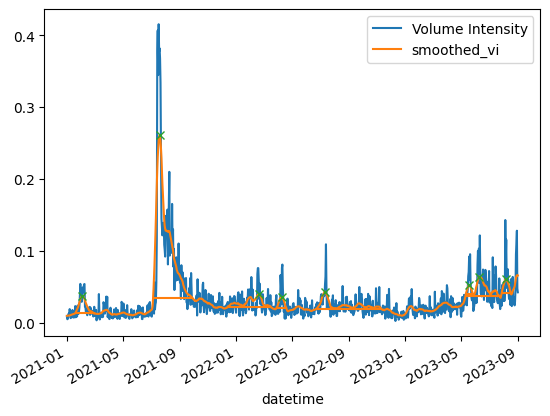

In [383]:
def to_date(x):
    """
    takes the first Timestamp of the df as a start date
    and then converts a given relative date x (in days)  
    back into a "normal" date
    
    Note how this only works since we resampled the df on a daily basis!
    """
    _start = df.loc[0,'datetime']
    return pd.to_datetime(_start) + pd.to_timedelta(x, unit='D')

def lpfilter(input_signal, win):
    # Low-pass linear Filter
    # (2*win)+1 is the size of the window that determines the values that influence 
    # the filtered result, centred over the current measurement
    kernel = np.lib.pad(np.linspace(1,3,win), (0,win-1), 'reflect') 
    kernel = np.divide(kernel,np.sum(kernel)) # normalise
    output_signal = ndimage.convolve(input_signal, kernel) 
    return output_signal

timelinevol['smoothed_vi'] = lpfilter(timelinevol["Volume Intensity"], 10) #.rolling(7).sum()   .ewm(span = 3600).mean()
fig = timelinevol.plot(x='datetime', y=["Volume Intensity", "smoothed_vi"])

# now find the peaks
idx, properties = find_peaks(timelinevol["smoothed_vi"], prominence=0.01, width=0.1, rel_height=0.9)

l = properties["left_ips"]
r = properties["right_ips"]
p = properties["prominences"]
w = properties["widths"]
wh = properties["width_heights"]

plt.plot(timelinevol["datetime"][idx], timelinevol["smoothed_vi"][idx], "x")
plt.hlines(y=wh, xmin=to_date(l), xmax=to_date(r), color = "C1")

In [384]:
for i, n in enumerate(l):
    print(f"Peak {i}: {to_date(l[i])} - {to_date(r[i])}")

Peak 0: 2021-01-18 06:01:50.566727602+00:00 - 2021-02-28 09:23:14.098360657+00:00
Peak 1: 2021-07-06 01:28:37.448903343+00:00 - 2021-09-28 16:36:46.947489903+00:00
Peak 2: 2021-12-13 08:32:12.488873668+00:00 - 2022-03-17 13:39:25.231010181+00:00
Peak 3: 2022-03-28 19:42:10.285714287+00:00 - 2022-04-19 12:37:47.842335768+00:00
Peak 4: 2022-06-21 07:37:46.628324947+00:00 - 2022-11-11 18:46:58.557020943+00:00
Peak 5: 2023-05-10 19:38:55.667267067+00:00 - 2023-05-26 00:28:51.347910325+00:00
Peak 6: 2023-05-10 04:16:22.793515639+00:00 - 2023-07-21 11:28:15.229759304+00:00
Peak 7: 2023-07-27 06:51:37.146571335+00:00 - 2023-08-15 12:19:23.755102040+00:00


In [392]:
fig.figure.savefig("tmp.png")

In [388]:
to_date(l[0]).strftime("%Y-%m-%d")

'2021-01-18'

In [104]:
def index_to_xdata(xdata, indices):
    "interpolate the values from signal.peak_widths to xdata"
    ind = np.arange(len(xdata))
    f = interp1d(ind,xdata)
    return f(indices)

import calendar

def toTimestamp(array):
  return [calendar.timegm(d.timetuple()) for d in array]


In [ ]:
event_datatime = timelinesourcecountry[0].values
for column in timelinesourcecountry[1:]:
    print(timelinesourcecountry[column].values)

In [ ]:
gdelt_filters = Filters(
                    keyword=keywords,
                    start_date=start_date,
                    end_date=final_date,
                    country="TM"
    )
    
resulting_articles = gdelt.article_search(gdelt_filters)
resulting_articles

In [31]:
data = pd.read_csv('./data/gdelt_crawled/flood_2021_09_01_2021_09_05.csv')
english_data = data.loc[data['language'] == "English"] 

In [32]:
english_data["title"]

17       John Schneider Louisiana Home Studio Struck by...
19       Hurricane Ida united states : Dolphin spotted ...
20       Domestic violence : Concrete action needed to ...
21       Domestic violence : Concrete action needed to ...
22       Domestic violence : Concrete action needed to ...
                               ...                        
12413    Lawmakers vow action after Ida floods Gulf Coa...
12414    Lawmakers vow action after Ida floods Gulf Coa...
12415    British watchdog demands more power over crypt...
12416    Lawmakers promise action after Ida floods Gulf...
12417      I wont leave . Residents of hard - hit Louis...
Name: title, Length: 3737, dtype: object

In [33]:
english_data

,Unnamed: 0,url,url_mobile,title,seendate,socialimage,domain,language,sourcecountry
17,17,https://newstalk870.am/dukes-of-hazzard-john-s...,NaN,John Schneider Louisiana Home Studio Struck by...,20210901T210000Z,https://townsquare.media/site/204/files/2021/0...,newstalk870.am,English,Armenia
19,19,https://www.9news.com.au/world/hurricane-ida-n...,https://amp.9news.com.au/article/0602bea4-5d3d...,Hurricane Ida united states : Dolphin spotted ...,20210901T064500Z,https://imageresizer.static9.net.au/pdWSiVHzzY...,9news.com.au,English,Australia
20,20,https://www.smh.com.au/politics/federal/the-di...,https://amp.smh.com.au/politics/federal/the-di...,Domestic violence : Concrete action needed to ...,20210901T201500Z,https://static.ffx.io/images/$zoom_0.190193965...,smh.com.au,English,Australia
21,21,https://www.theage.com.au/politics/federal/the...,https://amp.theage.com.au/politics/federal/the...,Domestic violence : Concrete action needed to ...,20210901T190000Z,https://static.ffx.io/images/$zoom_0.190193965...,theage.com.au,English,Australia
22,22,https://www.watoday.com.au/politics/federal/th...,https://amp.watoday.com.au/politics/federal/th...,Domestic violence : Concrete action needed to ...,20210901T184500Z,https://static.ffx.io/images/$zoom_0.190193965...,watoday.com.au,English,Australia
...,...,...,...,...,...,...,...,...,...
12413,12413,https://www.startribune.com/lawmakers-vow-acti...,https://m.startribune.com/lawmakers-vow-action...,Lawmakers vow action after Ida floods Gulf Coa...,20210906T153000Z,NaN,startribune.com,English,United States
12414,12414,https://www.stltoday.com/news/national/govt-an...,NaN,Lawmakers vow action after Ida floods Gulf Coa...,20210906T161500Z,https://bloximages.newyork1.vip.townnews.com/s...,stltoday.com,English,United States
12415,12415,https://www.oann.com/british-watchdog-demands-...,NaN,British watchdog demands more power over crypt...,20210906T150000Z,https://dzm0ugdauank9.cloudfront.net/wp-conten...,oann.com,English,United States
12416,12416,https://www.wfaa.com/article/news/nation-world...,https://www.wfaa.com/amp/article/news/nation-w...,Lawmakers promise action after Ida floods Gulf...,20210906T143000Z,https://media.wfaa.com/assets/CCT/images/a1d80...,wfaa.com,English,United States


In [34]:
english_data["title"].values

array(['John Schneider Louisiana Home Studio Struck by Hurricane Ida',
       'Hurricane Ida united states : Dolphin spotted swimming in hurricane flood waters',
       'Domestic violence : Concrete action needed to stop family violence',
       ..., 'British watchdog demands more power over crypto promotions',
       'Lawmakers promise action after Ida floods Gulf Coast , Northeast',
       '  I wont leave . Residents of hard - hit Louisiana town undeterred by another deadly hurricane'],
      dtype=object)

In [17]:
datetime_object = [datetime.datetime.strptime(s, '%Y%m%dT%H%M%SZ') for s in english_data["seendate"].values]
datetime_object

[datetime.datetime(2021, 9, 1, 21, 0),
 datetime.datetime(2021, 9, 1, 6, 45),
 datetime.datetime(2021, 9, 1, 20, 15),
 datetime.datetime(2021, 9, 1, 19, 0),
 datetime.datetime(2021, 9, 1, 18, 45),
 datetime.datetime(2021, 9, 1, 21, 0),
 datetime.datetime(2021, 9, 1, 4, 30),
 datetime.datetime(2021, 9, 1, 3, 0),
 datetime.datetime(2021, 9, 1, 0, 30),
 datetime.datetime(2021, 9, 1, 1, 30),
 datetime.datetime(2021, 9, 1, 0, 45),
 datetime.datetime(2021, 9, 1, 4, 45),
 datetime.datetime(2021, 9, 1, 10, 30),
 datetime.datetime(2021, 9, 1, 20, 45),
 datetime.datetime(2021, 9, 1, 23, 45),
 datetime.datetime(2021, 9, 1, 18, 0),
 datetime.datetime(2021, 9, 1, 5, 30),
 datetime.datetime(2021, 9, 1, 3, 0),
 datetime.datetime(2021, 9, 1, 9, 45),
 datetime.datetime(2021, 9, 1, 6, 45),
 datetime.datetime(2021, 9, 1, 20, 15),
 datetime.datetime(2021, 9, 1, 13, 45),
 datetime.datetime(2021, 9, 1, 15, 0),
 datetime.datetime(2021, 9, 1, 18, 30),
 datetime.datetime(2021, 9, 1, 20, 15),
 datetime.datetime

In [ ]:
english_data["seendate"] = english_data["seendate"].astype("datetime64")
english_data.groupby(english_data["seendate"].dt.month).count().plot(kind="bar")


<Axes: xlabel='seendate'>

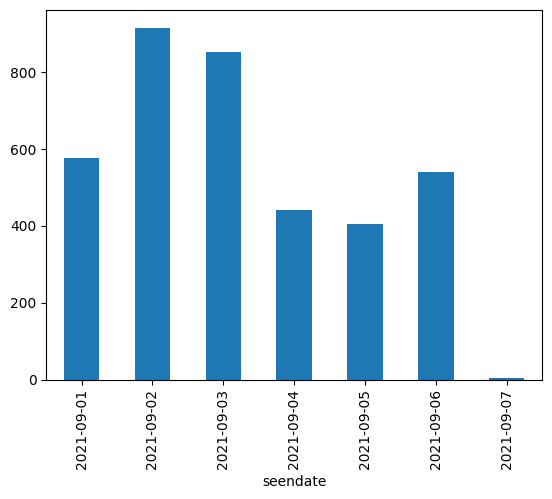

In [23]:
date_df = pd.to_datetime(english_data["seendate"])
date_df.groupby(date_df.dt.date).count().plot(kind="bar")


In [35]:
model = SentenceTransformer('all-MiniLM-L6-v2')


In [41]:
corpus_embeddings = model.encode(english_data["title"].values, batch_size=64, show_progress_bar=True, convert_to_tensor=True)
start_time = time.time()
clusters = util.community_detection(corpus_embeddings, min_community_size=25, threshold=0.75)

Batches:   0%|          | 0/59 [00:00<?, ?it/s]

In [42]:
print("Clustering done after {:.2f} sec".format(time.time() - start_time))

#Print for all clusters the top 3 and bottom 3 elements
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    #for sentence_id in cluster[0:]:
    #    print("\t", english_data["title"].values[sentence_id])
    #print("\t", "...")
    #for sentence_id in cluster[-3:]:
    #    print("\t", english_data["title"].values[sentence_id])
    cluster_sentences = list(set([english_data["title"].values[sentence_id] for sentence_id in cluster[0:]]))
    for s in cluster_sentences:
        print(f"  {s}")


Clustering done after 1.54 sec

Cluster 1, #237 Elements 
  Hurricane Ida : New York City floods in wake of hurricane
  Nine dead in New York City and New Jersey as Ida brings flash flooding
  Dozens dead as Hurricane Ida triggers flash floods in New York area
  Dozens Killed as Remnants of Hurricane Ida Batters New York
  At least 8 killed as remnants of Hurricane Ida pass through Northeast
  Hurricane Ida flooding kills at least 8 in NYC , historic rainfall
  Eight Dead In New York City As Ida Brings Flash Flooding
  At least 8 killed as Hurricane Ida remnants pummel New York , northeastern US | News | DW
  At Least 14 Dead After Storm Ida Flooded New York And New Jersey
  Hurricane Ida : Deadly flooding hits New York City , New Jersey
  IN PICTURES : Six reported dead in US rains after Hurricane Ida
  Storm Ida : Flash flooding in New York and New Jersey kills nine
  Hurricane Ida : At least 8 deaths as Hurricane Ida remnants hit Northeast | World News
  New York floods : Six dead a

In [43]:
len(clusters)

18